In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_columns', None) #melihat semua kolom

In [8]:
dataset = pd.read_csv('hepatitis.data')

In [9]:
dataset

,2,30,2.1,1,2.2,2.3,2.4,2.5,1.1,2.6,2.7,2.8,2.9,2.10,1.00,85,18,4.0,?,1.2
0,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
1,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
2,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
3,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,0.90,95,28,4.0,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
150,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
151,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
152,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [10]:
dataset = pd.read_csv('hepatitis.data', header=None)

In [11]:
dataset

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


In [12]:
dataset.columns=["Class","A1","A2","A3","A4","A5","A6","A7","A8","A9","A10",
                 "A11","A12","A13","A14","A15","A16","A17","A18","A19"]

In [13]:
dataset

,Class,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,?,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,?,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,?,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2


# BAB 2 – Menelaah data

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   155 non-null    int64 
 1   A1      155 non-null    int64 
 2   A2      155 non-null    int64 
 3   A3      155 non-null    object
 4   A4      155 non-null    int64 
 5   A5      155 non-null    object
 6   A6      155 non-null    object
 7   A7      155 non-null    object
 8   A8      155 non-null    object
 9   A9      155 non-null    object
 10  A10     155 non-null    object
 11  A11     155 non-null    object
 12  A12     155 non-null    object
 13  A13     155 non-null    object
 14  A14     155 non-null    object
 15  A15     155 non-null    object
 16  A16     155 non-null    object
 17  A17     155 non-null    object
 18  A18     155 non-null    object
 19  A19     155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


In [16]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


A3 : ['1' '2' '?']
A5 : ['2' '1' '?']
A6 : ['2' '1' '?']
A7 : ['2' '1' '?']
A8 : ['1' '2' '?']
A9 : ['2' '1' '?']
A10 : ['2' '1' '?']
A11 : ['2' '1' '?']
A12 : ['2' '1' '?']
A13 : ['2' '?' '1']
A14 : ['1.00' '0.90' '0.70' '?' '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
A17 : ['4.0' '3.5' '?' '4.4' '3.9' '3.7' '4.9' '2.9' '4.3' '4.1' '4.2' '4.7'
 '3.8' '2.7' '4.6' '5.0' '3.3' '4.5' '3.4' '3.1' '3.0' '2.6' '5.3' '4.8'
 '2.8' '3.6' '2.1' '6.4' '2.4' '2.2']
A18 : ['?' '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']


In [17]:
dataset['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

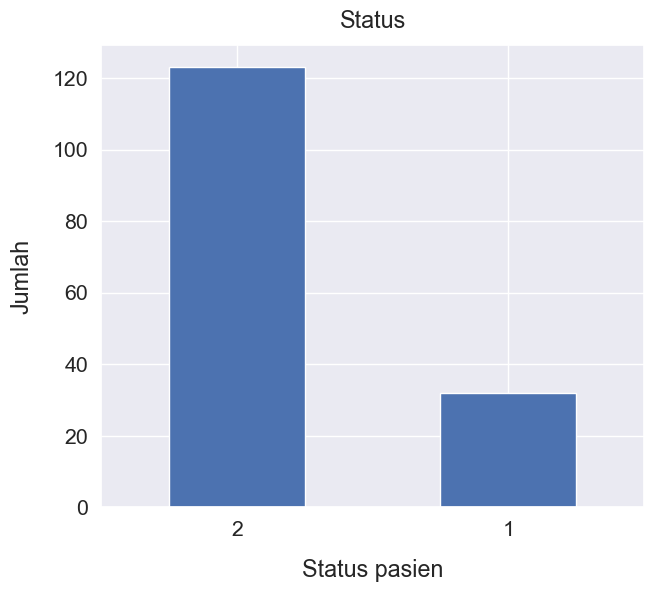

In [18]:
sns.set(font_scale=1.4)
dataset['Class'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Status pasien", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status", y=1.02);

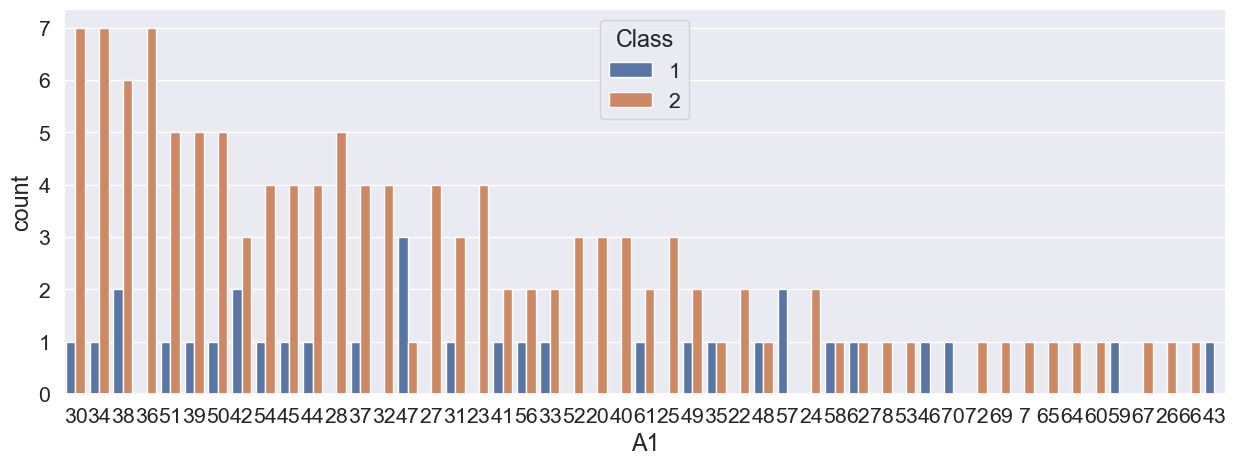

In [19]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A1'],order=dataset['A1'].value_counts().index,hue=dataset['Class'])
plt.show()

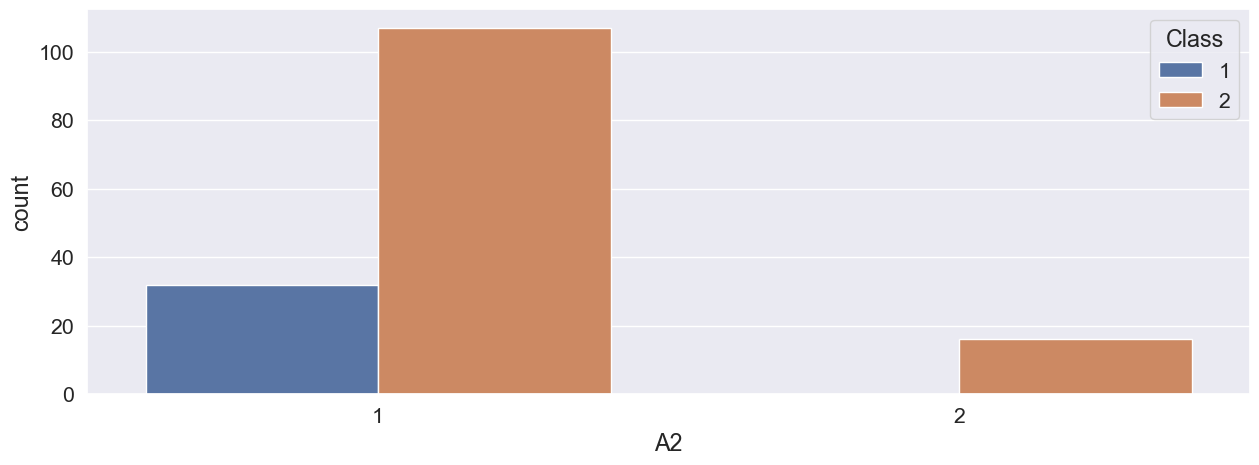

In [20]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A2'],order=dataset['A2'].value_counts().index,hue=dataset['Class'])
plt.show()

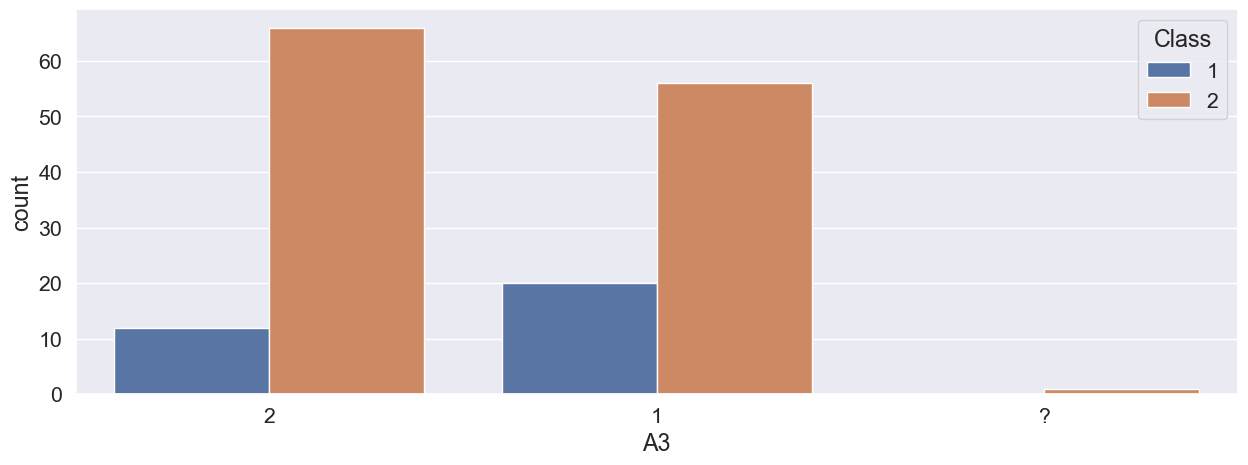

In [21]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A3'],order=dataset['A3'].value_counts().index,hue=dataset['Class'])
plt.show()

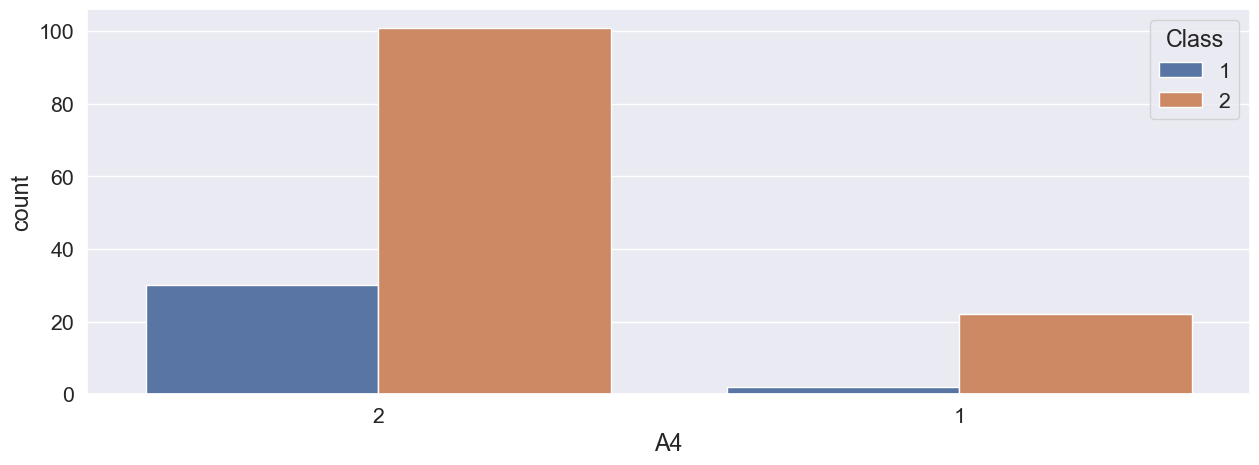

In [22]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A4'],order=dataset['A4'].value_counts().index,hue=dataset['Class'])
plt.show()

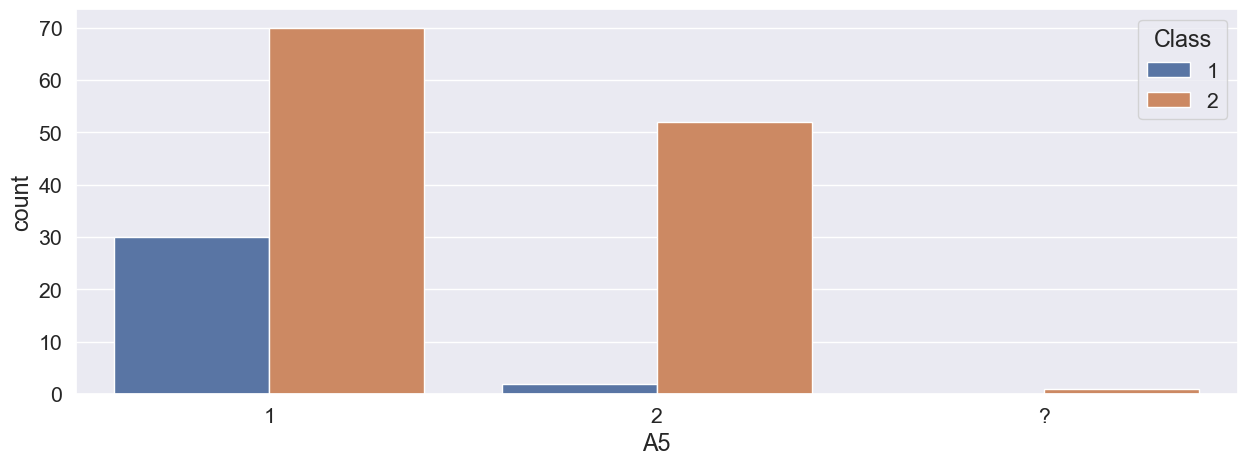

In [23]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A5'],order=dataset['A5'].value_counts().index,hue=dataset['Class'])
plt.show()

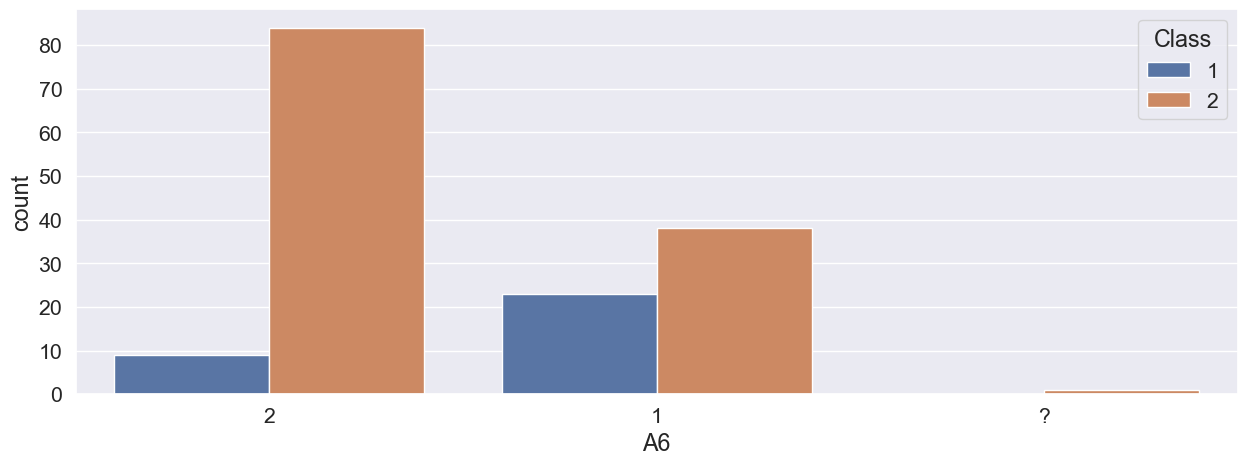

In [24]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A6'],order=dataset['A6'].value_counts().index,hue=dataset['Class'])
plt.show()

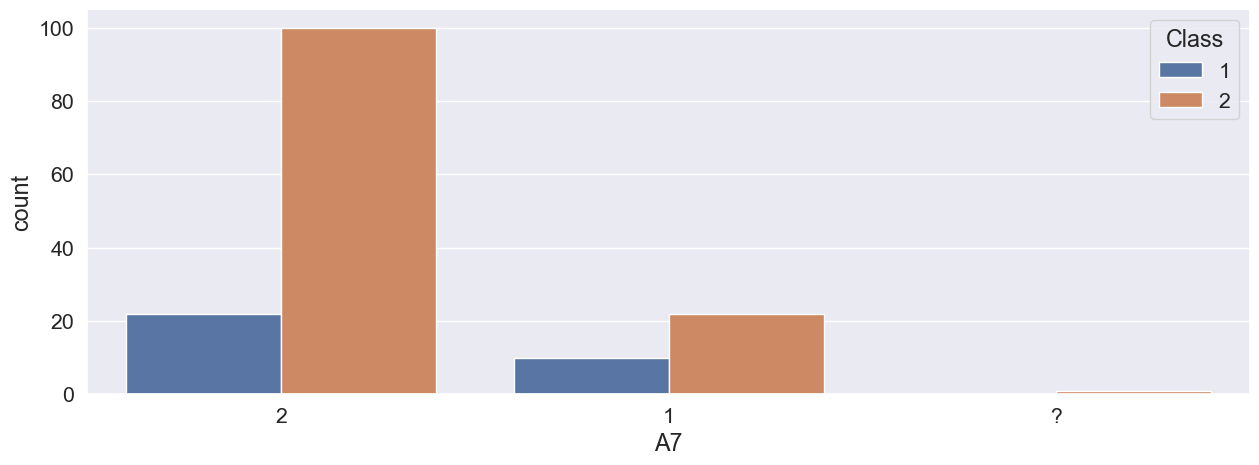

In [25]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A7'],order=dataset['A7'].value_counts().index,hue=dataset['Class'])
plt.show()

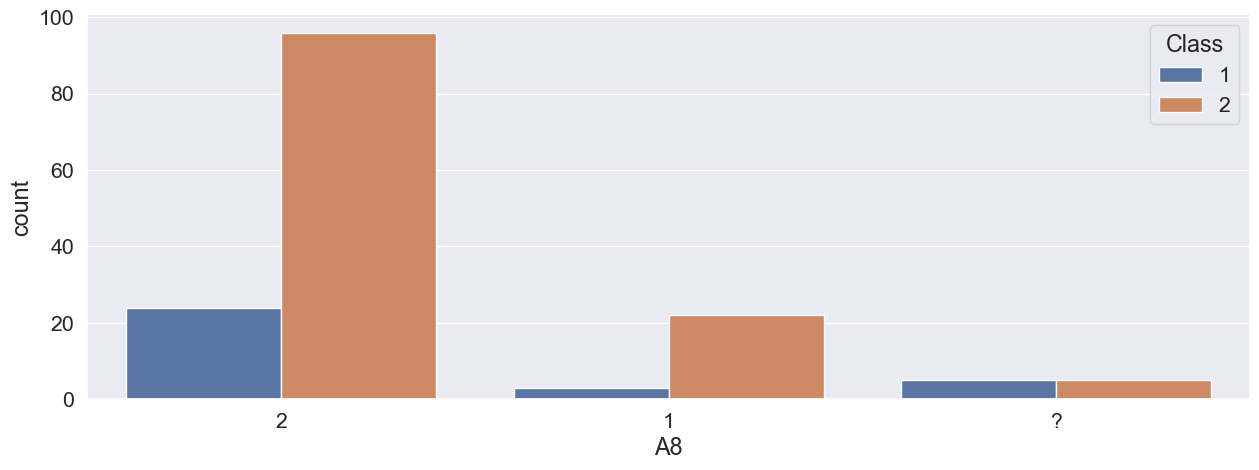

In [26]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A8'],order=dataset['A8'].value_counts().index,hue=dataset['Class'])
plt.show()

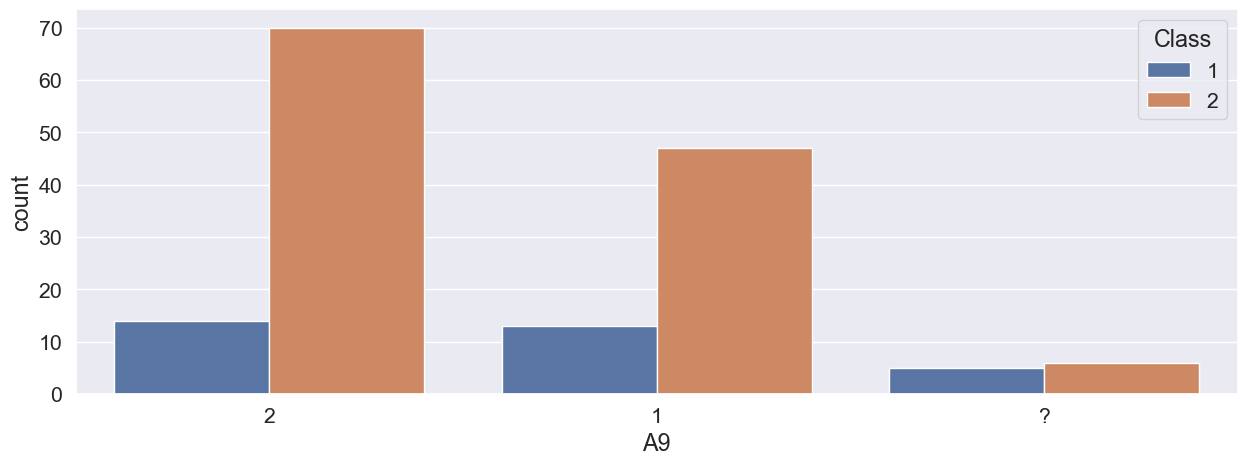

In [27]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A9'],order=dataset['A9'].value_counts().index,hue=dataset['Class'])
plt.show()

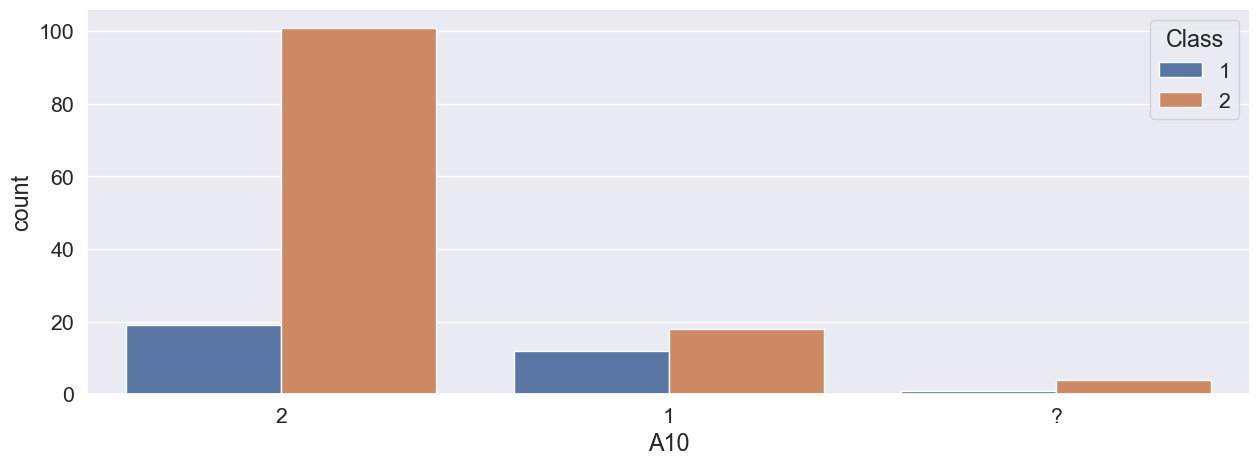

In [28]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A10'],order=dataset['A10'].value_counts().index,hue=dataset['Class'])
plt.show()

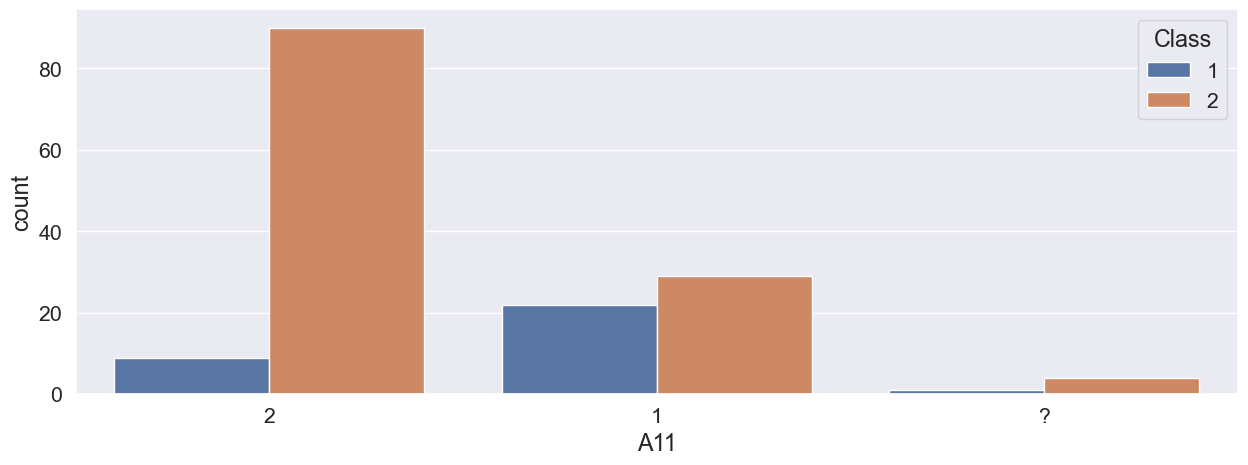

In [29]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A11'],order=dataset['A11'].value_counts().index,hue=dataset['Class'])
plt.show()

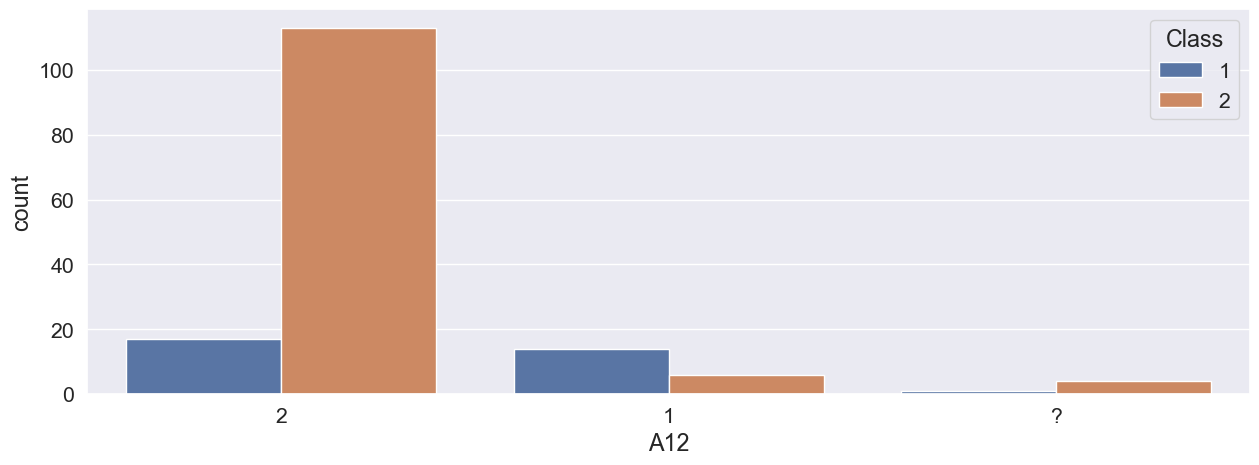

In [30]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A12'],order=dataset['A12'].value_counts().index,hue=dataset['Class'])
plt.show()

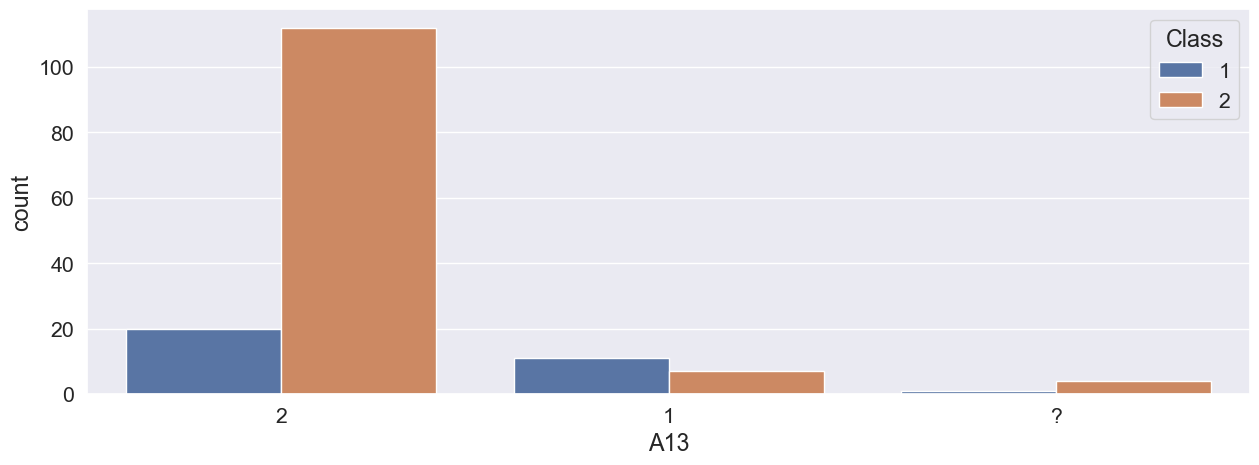

In [31]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A13'],order=dataset['A13'].value_counts().index,hue=dataset['Class'])
plt.show()

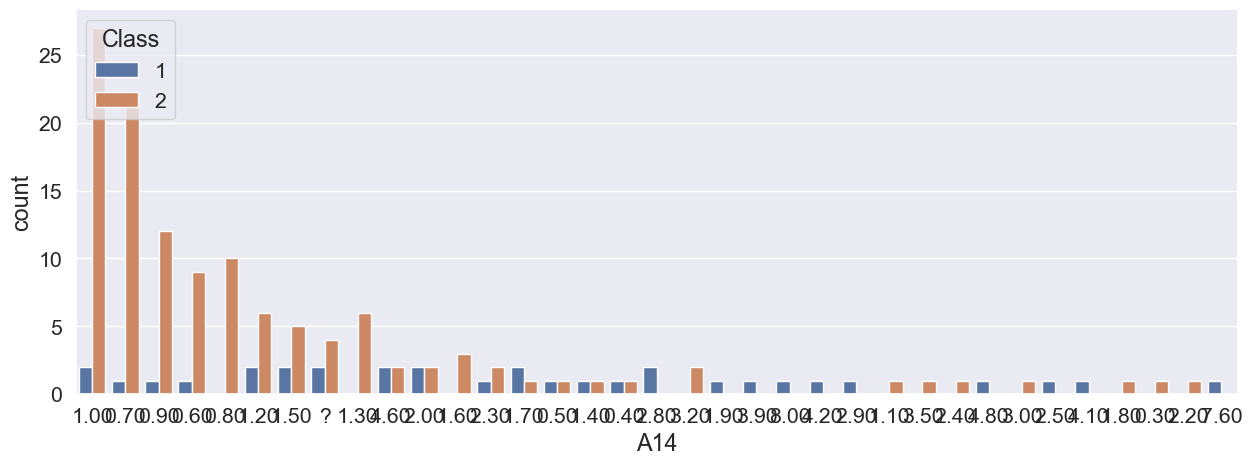

In [32]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A14'],order=dataset['A14'].value_counts().index,hue=dataset['Class'])
plt.show()

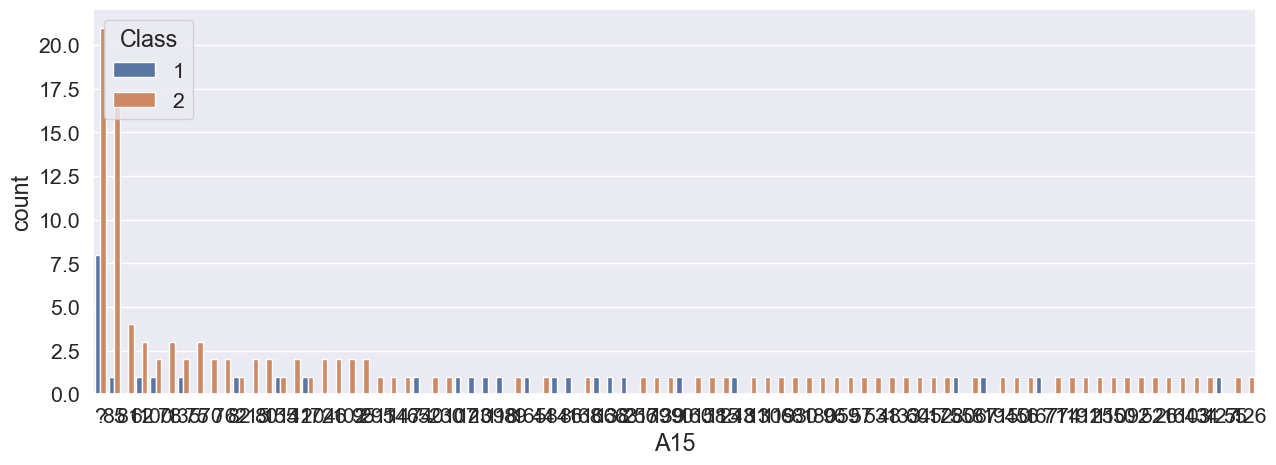

In [33]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A15'],order=dataset['A15'].value_counts().index,hue=dataset['Class'])
plt.show()

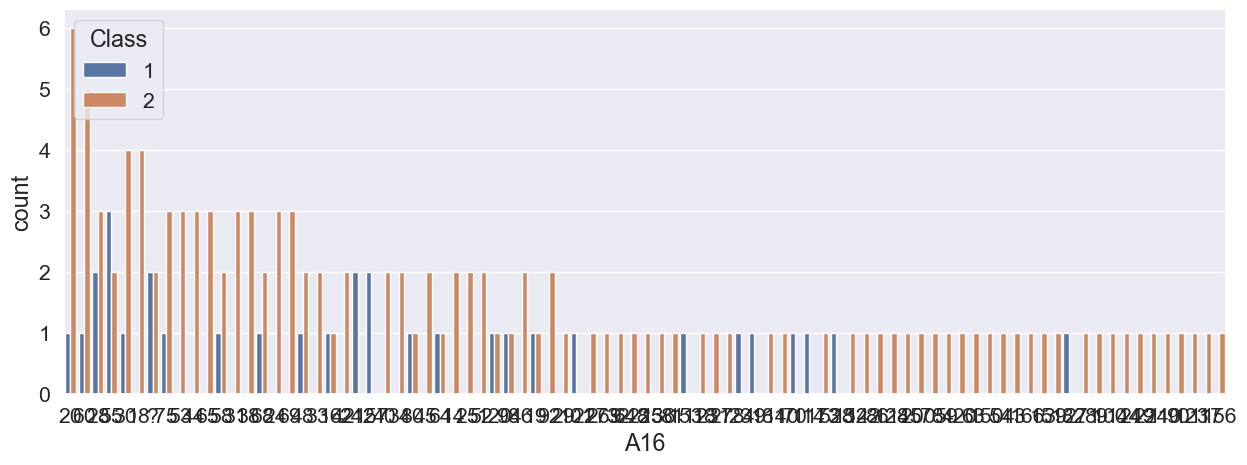

In [34]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A16'],order=dataset['A16'].value_counts().index,hue=dataset['Class'])
plt.show()

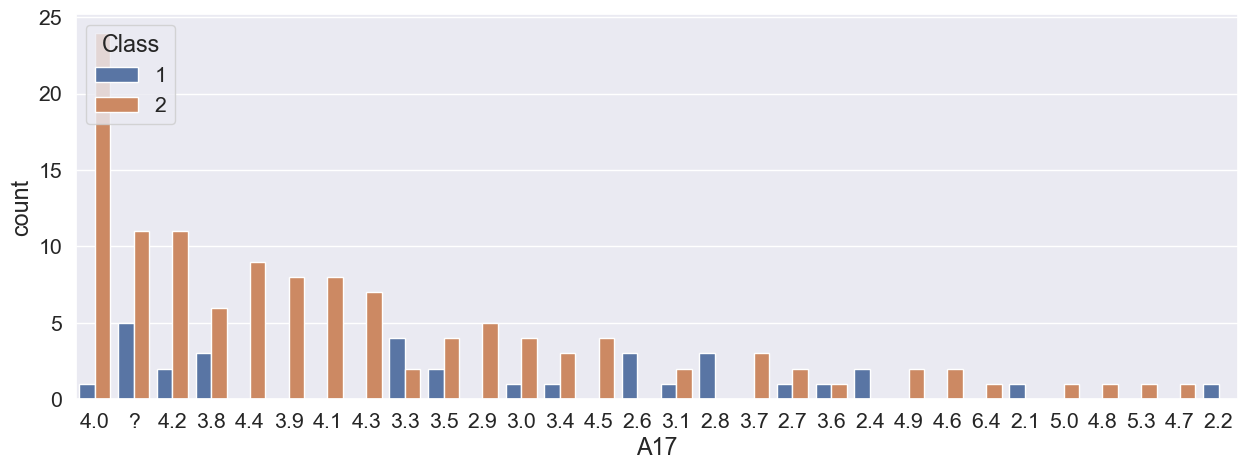

In [35]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A17'],order=dataset['A17'].value_counts().index,hue=dataset['Class'])
plt.show()

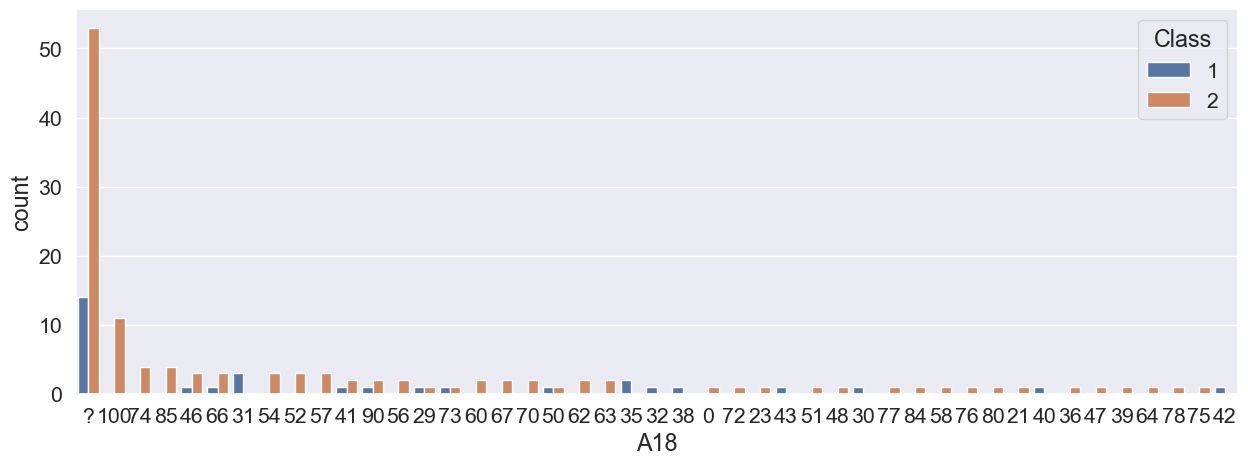

In [36]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A18'],order=dataset['A18'].value_counts().index,hue=dataset['Class'])
plt.show()

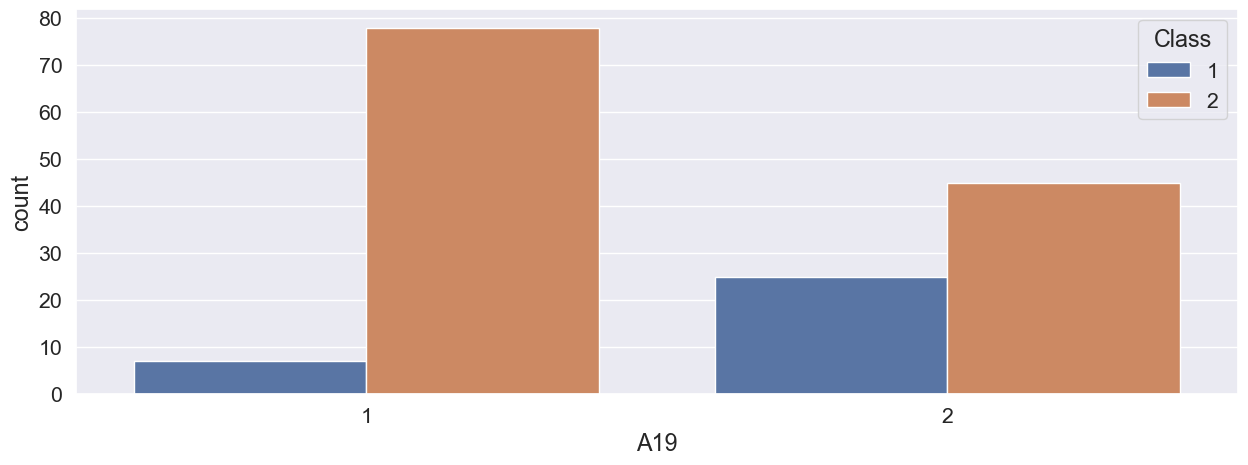

In [37]:
plt.subplots(figsize = (15,5))
sns.countplot(x=dataset['A19'],order=dataset['A19'].value_counts().index,hue=dataset['Class'])
plt.show()

# cek korelasi tahap 1

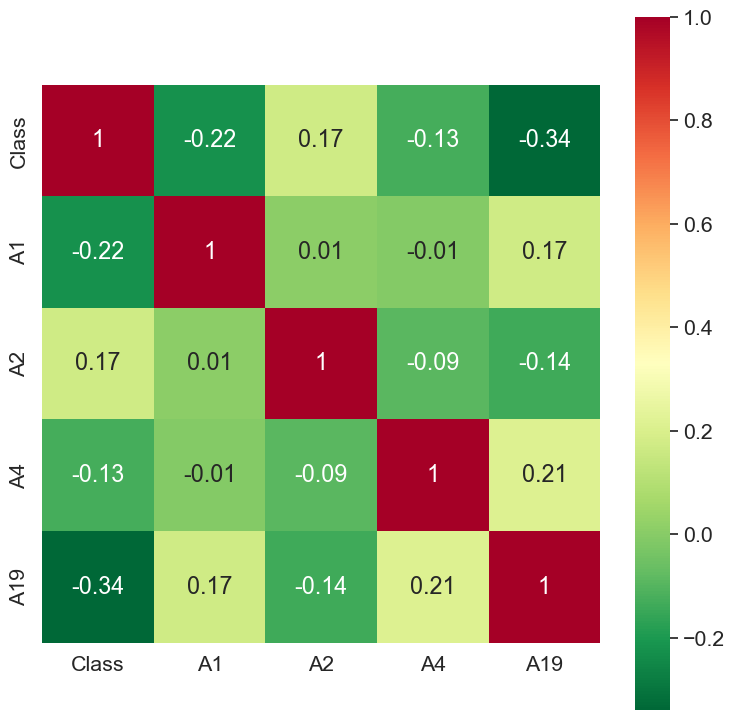

In [38]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# Bab 3 Memvalidasi Data

temuan :

    masih ada data ? atau missing value
    kelas tidak seimbang
    semua variable tidak keluar karena data masih dalam bentuk objek belum kategory

sehingga selanjutnya perlu mengubah object menjadi numeric serta mengatasi data yang hilang


# BAB 4 – Menentukan Objek Data

silakan generate table menggunakan https://www.tablesgenerator.com/markdown_tables

# BAB 5 – membersihkan data

In [39]:
dataset.replace("?", np.nan, inplace= True) #membersihkan data yang masih ada tanda tanya

In [40]:
dataset.head()

,Class,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1


In [41]:
dataset.tail()

,Class,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2
153,2,53,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2
154,1,43,1,2,2,1,2,2,2,2,1,1,1,2,1.20,100,19,3.1,42,2


In [42]:
categorical_col = []
for column in dataset.columns:
    if dataset[column].dtype == object and len(dataset[column].unique()) <= 50: #mengecek level/isi data kolom (bisa object, int, dan tipe data lainnya)
        categorical_col.append(column)
        print(f"{column} : {dataset[column].unique()}")
        print("====================================")


A3 : ['1' '2' nan]
A5 : ['2' '1' nan]
A6 : ['2' '1' nan]
A7 : ['2' '1' nan]
A8 : ['1' '2' nan]
A9 : ['2' '1' nan]
A10 : ['2' '1' nan]
A11 : ['2' '1' nan]
A12 : ['2' '1' nan]
A13 : ['2' nan '1']
A14 : ['1.00' '0.90' '0.70' nan '1.30' '2.20' '2.00' '1.20' '0.60' '0.40' '0.80'
 '1.40' '2.30' '0.50' '0.30' '4.60' '1.80' '3.50' '4.10' '1.60' '2.80'
 '1.50' '2.50' '3.00' '4.80' '2.40' '1.70' '1.10' '3.20' '2.90' '8.00'
 '3.90' '1.90' '4.20' '7.60']
A17 : ['4.0' '3.5' nan '4.4' '3.9' '3.7' '4.9' '2.9' '4.3' '4.1' '4.2' '4.7'
 '3.8' '2.7' '4.6' '5.0' '3.3' '4.5' '3.4' '3.1' '3.0' '2.6' '5.3' '4.8'
 '2.8' '3.6' '2.1' '6.4' '2.4' '2.2']
A18 : [nan '80' '75' '85' '54' '52' '78' '46' '63' '62' '64' '39' '100' '47'
 '70' '36' '40' '74' '60' '73' '90' '21' '77' '29' '41' '66' '57' '56'
 '76' '58' '84' '38' '67' '31' '51' '23' '72' '32' '30' '0' '50' '43' '35'
 '48' '42']


In [43]:
dataset.isnull().values.any() #Jika True artinya ada data yg hilang

True

In [44]:
dataset.loc[:, dataset.isnull().any()].columns #Feature yg terdiri data hilang

Index(['A3', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14',
       'A15', 'A16', 'A17', 'A18'],
      dtype='object')

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   155 non-null    int64 
 1   A1      155 non-null    int64 
 2   A2      155 non-null    int64 
 3   A3      154 non-null    object
 4   A4      155 non-null    int64 
 5   A5      154 non-null    object
 6   A6      154 non-null    object
 7   A7      154 non-null    object
 8   A8      145 non-null    object
 9   A9      144 non-null    object
 10  A10     150 non-null    object
 11  A11     150 non-null    object
 12  A12     150 non-null    object
 13  A13     150 non-null    object
 14  A14     149 non-null    object
 15  A15     126 non-null    object
 16  A16     151 non-null    object
 17  A17     139 non-null    object
 18  A18     88 non-null     object
 19  A19     155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


# Cek Distribusi data yang hilang

<AxesSubplot:>

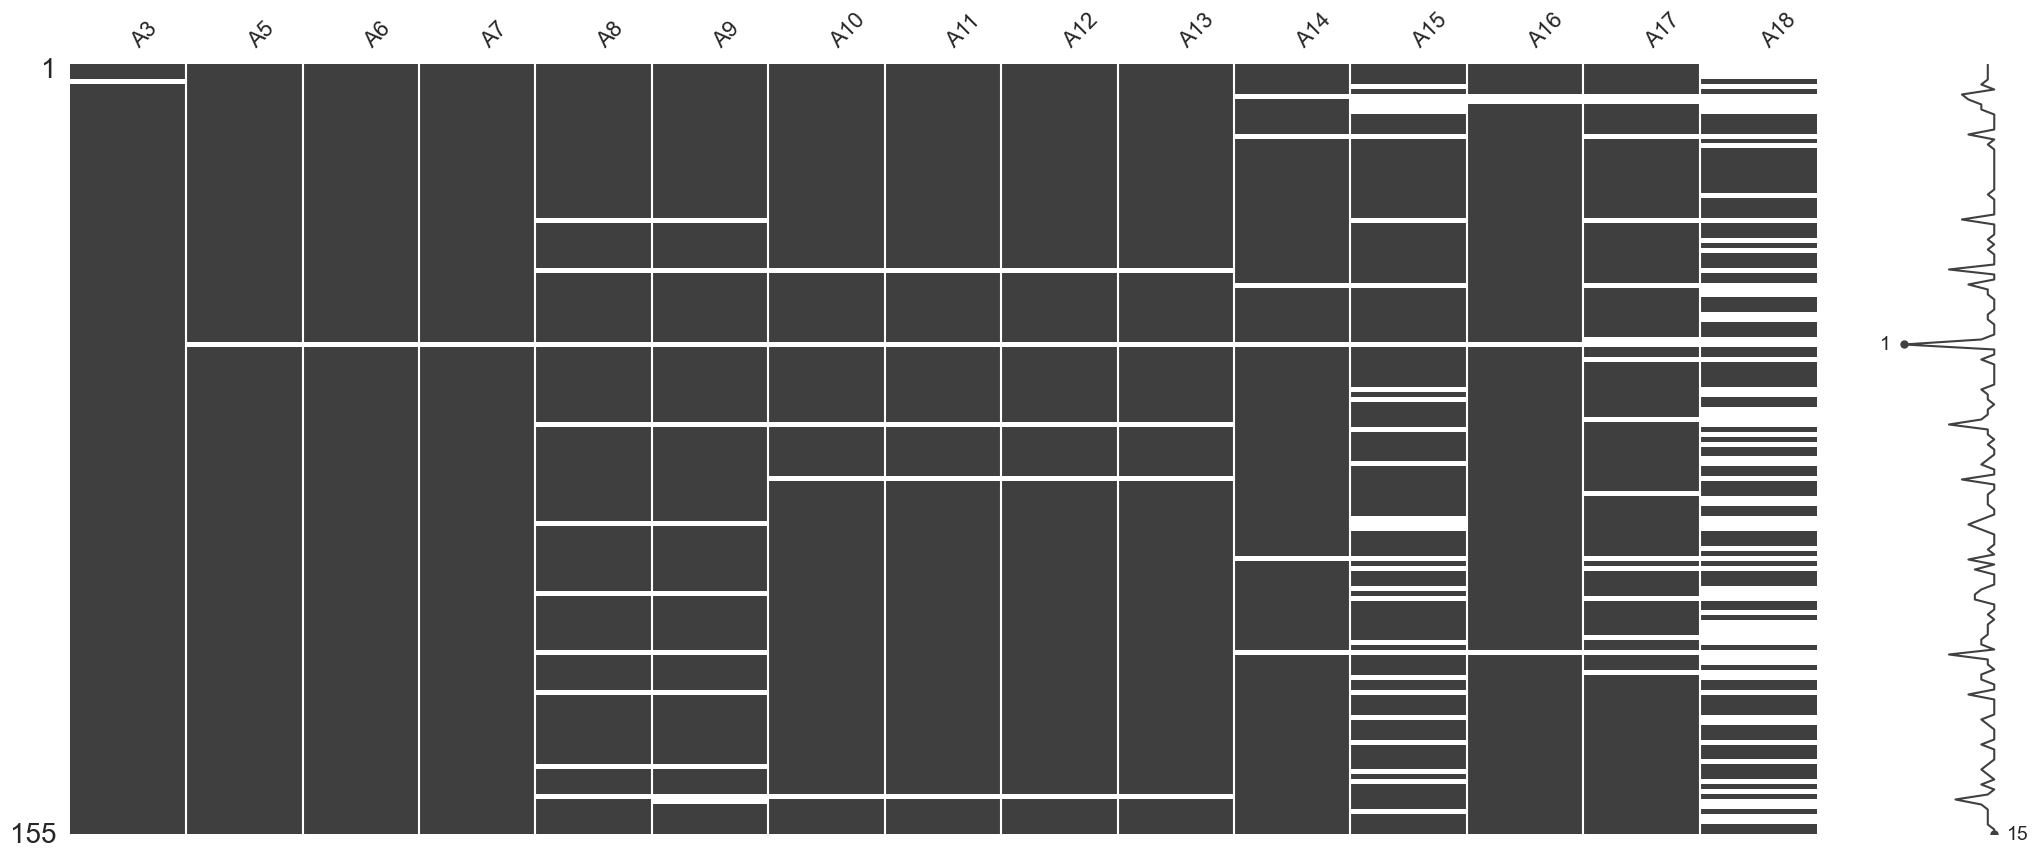

In [46]:
missingdata_df = dataset.columns[dataset.isnull().any()].tolist()
missingno.matrix(dataset[missingdata_df])

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   155 non-null    int64 
 1   A1      155 non-null    int64 
 2   A2      155 non-null    int64 
 3   A3      154 non-null    object
 4   A4      155 non-null    int64 
 5   A5      154 non-null    object
 6   A6      154 non-null    object
 7   A7      154 non-null    object
 8   A8      145 non-null    object
 9   A9      144 non-null    object
 10  A10     150 non-null    object
 11  A11     150 non-null    object
 12  A12     150 non-null    object
 13  A13     150 non-null    object
 14  A14     149 non-null    object
 15  A15     126 non-null    object
 16  A16     151 non-null    object
 17  A17     139 non-null    object
 18  A18     88 non-null     object
 19  A19     155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


# Mengisi data hilang dengan nilai median


In [51]:
median_value=dataset['A3'].median()
dataset['A3']=dataset['A3'].fillna(median_value)

median_value=dataset['A5'].median()
dataset['A5']=dataset['A5'].fillna(median_value)

median_value=dataset['A6'].median()
dataset['A6']=dataset['A6'].fillna(median_value)

median_value=dataset['A7'].median()
dataset['A7']=dataset['A7'].fillna(median_value)

median_value=dataset['A8'].median()
dataset['A8']=dataset['A8'].fillna(median_value)

median_value=dataset['A9'].median()
dataset['A9']=dataset['A9'].fillna(median_value)

median_value=dataset['A10'].median()
dataset['A10']=dataset['A10'].fillna(median_value)

median_value=dataset['A11'].median()
dataset['A11']=dataset['A11'].fillna(median_value)

median_value=dataset['A10'].median()
dataset['A10']=dataset['A10'].fillna(median_value)

median_value=dataset['A11'].median()
dataset['A11']=dataset['A11'].fillna(median_value)

median_value=dataset['A12'].median()
dataset['A12']=dataset['A12'].fillna(median_value)

median_value=dataset['A13'].median()
dataset['A13']=dataset['A13'].fillna(median_value)

median_value=dataset['A14'].median()
dataset['A14']=dataset['A14'].fillna(median_value)

median_value=dataset['A15'].median()
dataset['A15']=dataset['A15'].fillna(median_value)

median_value=dataset['A16'].median()
dataset['A16']=dataset['A16'].fillna(median_value)

median_value=dataset['A17'].median()
dataset['A17']=dataset['A17'].fillna(median_value)

median_value=dataset['A18'].median()
dataset['A18']=dataset['A18'].fillna(median_value)

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   155 non-null    int64 
 1   A1      155 non-null    int64 
 2   A2      155 non-null    int64 
 3   A3      155 non-null    object
 4   A4      155 non-null    int64 
 5   A5      155 non-null    object
 6   A6      155 non-null    object
 7   A7      155 non-null    object
 8   A8      155 non-null    object
 9   A9      155 non-null    object
 10  A10     155 non-null    object
 11  A11     155 non-null    object
 12  A12     155 non-null    object
 13  A13     155 non-null    object
 14  A14     155 non-null    object
 15  A15     155 non-null    object
 16  A16     155 non-null    object
 17  A17     155 non-null    object
 18  A18     155 non-null    object
 19  A19     155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


# Bab 6 Mengkonstruksi Data

In [53]:
#mengubah tipe data object menjadi float

dataset['A3'] = dataset['A3'].astype(str).astype(float)
dataset['A5'] = dataset['A5'].astype(str).astype(float)
dataset['A6'] = dataset['A6'].astype(str).astype(float)
dataset['A7'] = dataset['A7'].astype(str).astype(float)
dataset['A8'] = dataset['A8'].astype(str).astype(float)
dataset['A9'] = dataset['A9'].astype(str).astype(float)
dataset['A10'] = dataset['A10'].astype(str).astype(float)
dataset['A11'] = dataset['A11'].astype(str).astype(float)
dataset['A12'] = dataset['A12'].astype(str).astype(float)
dataset['A13'] = dataset['A13'].astype(str).astype(float)
dataset['A14'] = dataset['A14'].astype(str).astype(float)
dataset['A15'] = dataset['A15'].astype(str).astype(float)
dataset['A16'] = dataset['A16'].astype(str).astype(float)
dataset['A17'] = dataset['A17'].astype(str).astype(float)
dataset['A18'] = dataset['A18'].astype(str).astype(float)

In [54]:
#cek dataset
dataset

,Class,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19
0,2,30,2,1.0,2,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,61.0,1
1,2,50,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,61.0,1
2,2,78,1,2.0,2,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,61.0,1
3,2,31,1,2.0,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,2,34,1,2.0,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,200.0,4.0,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2.0,2,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,7.6,85.0,242.0,3.3,50.0,2
151,2,44,1,2.0,2,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,61.0,2
152,2,61,1,1.0,2,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,61.0,2
153,2,53,2,1.0,2,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   155 non-null    int64  
 1   A1      155 non-null    int64  
 2   A2      155 non-null    int64  
 3   A3      155 non-null    float64
 4   A4      155 non-null    int64  
 5   A5      155 non-null    float64
 6   A6      155 non-null    float64
 7   A7      155 non-null    float64
 8   A8      155 non-null    float64
 9   A9      155 non-null    float64
 10  A10     155 non-null    float64
 11  A11     155 non-null    float64
 12  A12     155 non-null    float64
 13  A13     155 non-null    float64
 14  A14     155 non-null    float64
 15  A15     155 non-null    float64
 16  A16     155 non-null    float64
 17  A17     155 non-null    float64
 18  A18     155 non-null    float64
 19  A19     155 non-null    int64  
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


Menghapus Nilai Konstan

In [56]:
dataset = dataset.loc[:,dataset.apply(pd.Series.nunique) != 1]

In [57]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   155 non-null    int64  
 1   A1      155 non-null    int64  
 2   A2      155 non-null    int64  
 3   A3      155 non-null    float64
 4   A4      155 non-null    int64  
 5   A5      155 non-null    float64
 6   A6      155 non-null    float64
 7   A7      155 non-null    float64
 8   A8      155 non-null    float64
 9   A9      155 non-null    float64
 10  A10     155 non-null    float64
 11  A11     155 non-null    float64
 12  A12     155 non-null    float64
 13  A13     155 non-null    float64
 14  A14     155 non-null    float64
 15  A15     155 non-null    float64
 16  A16     155 non-null    float64
 17  A17     155 non-null    float64
 18  A18     155 non-null    float64
 19  A19     155 non-null    int64  
dtypes: float64(15), int64(5)
memory usage: 24.3 KB


# Cek Korelasi Tahap 2

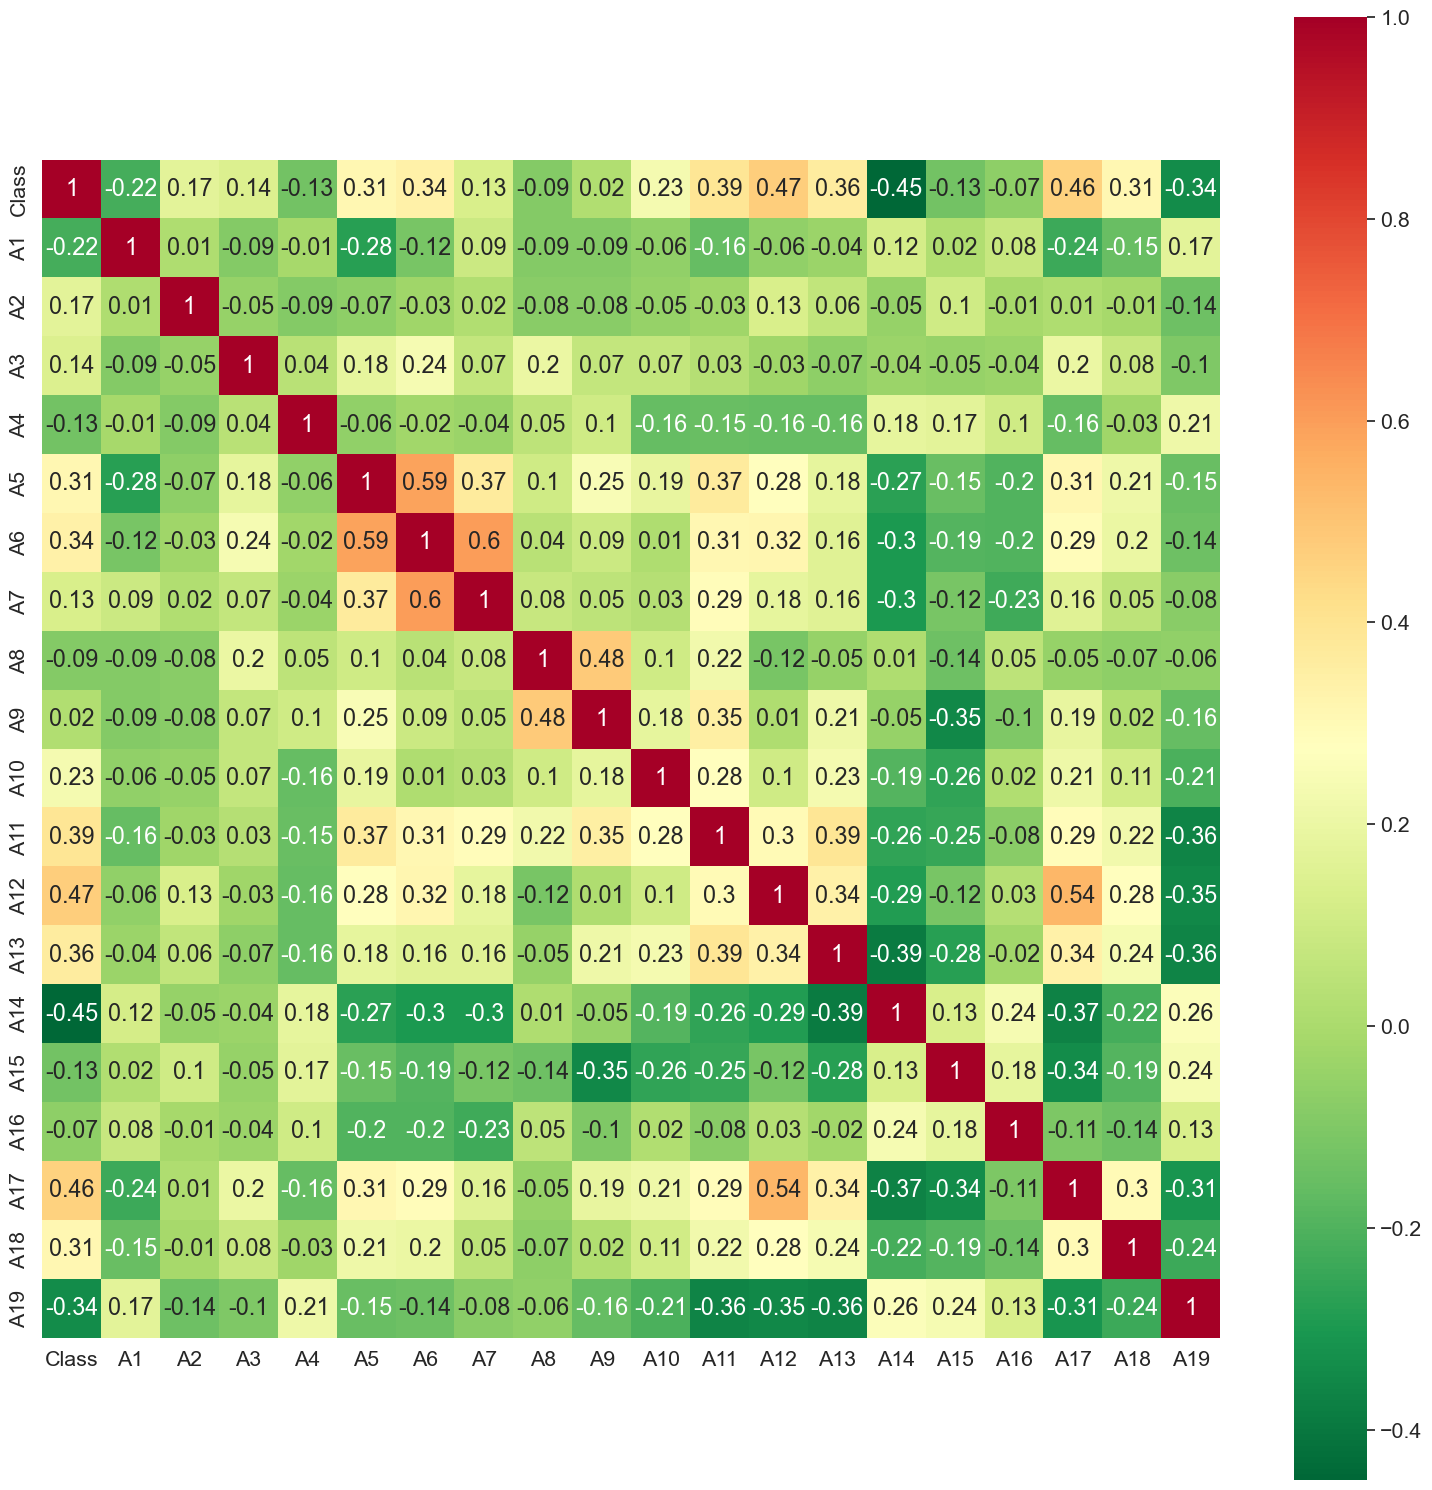

In [58]:
# Correlation Heatmap
correlation = dataset.corr()
plt.subplots(figsize = (19,19))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

# cek Bloxplot

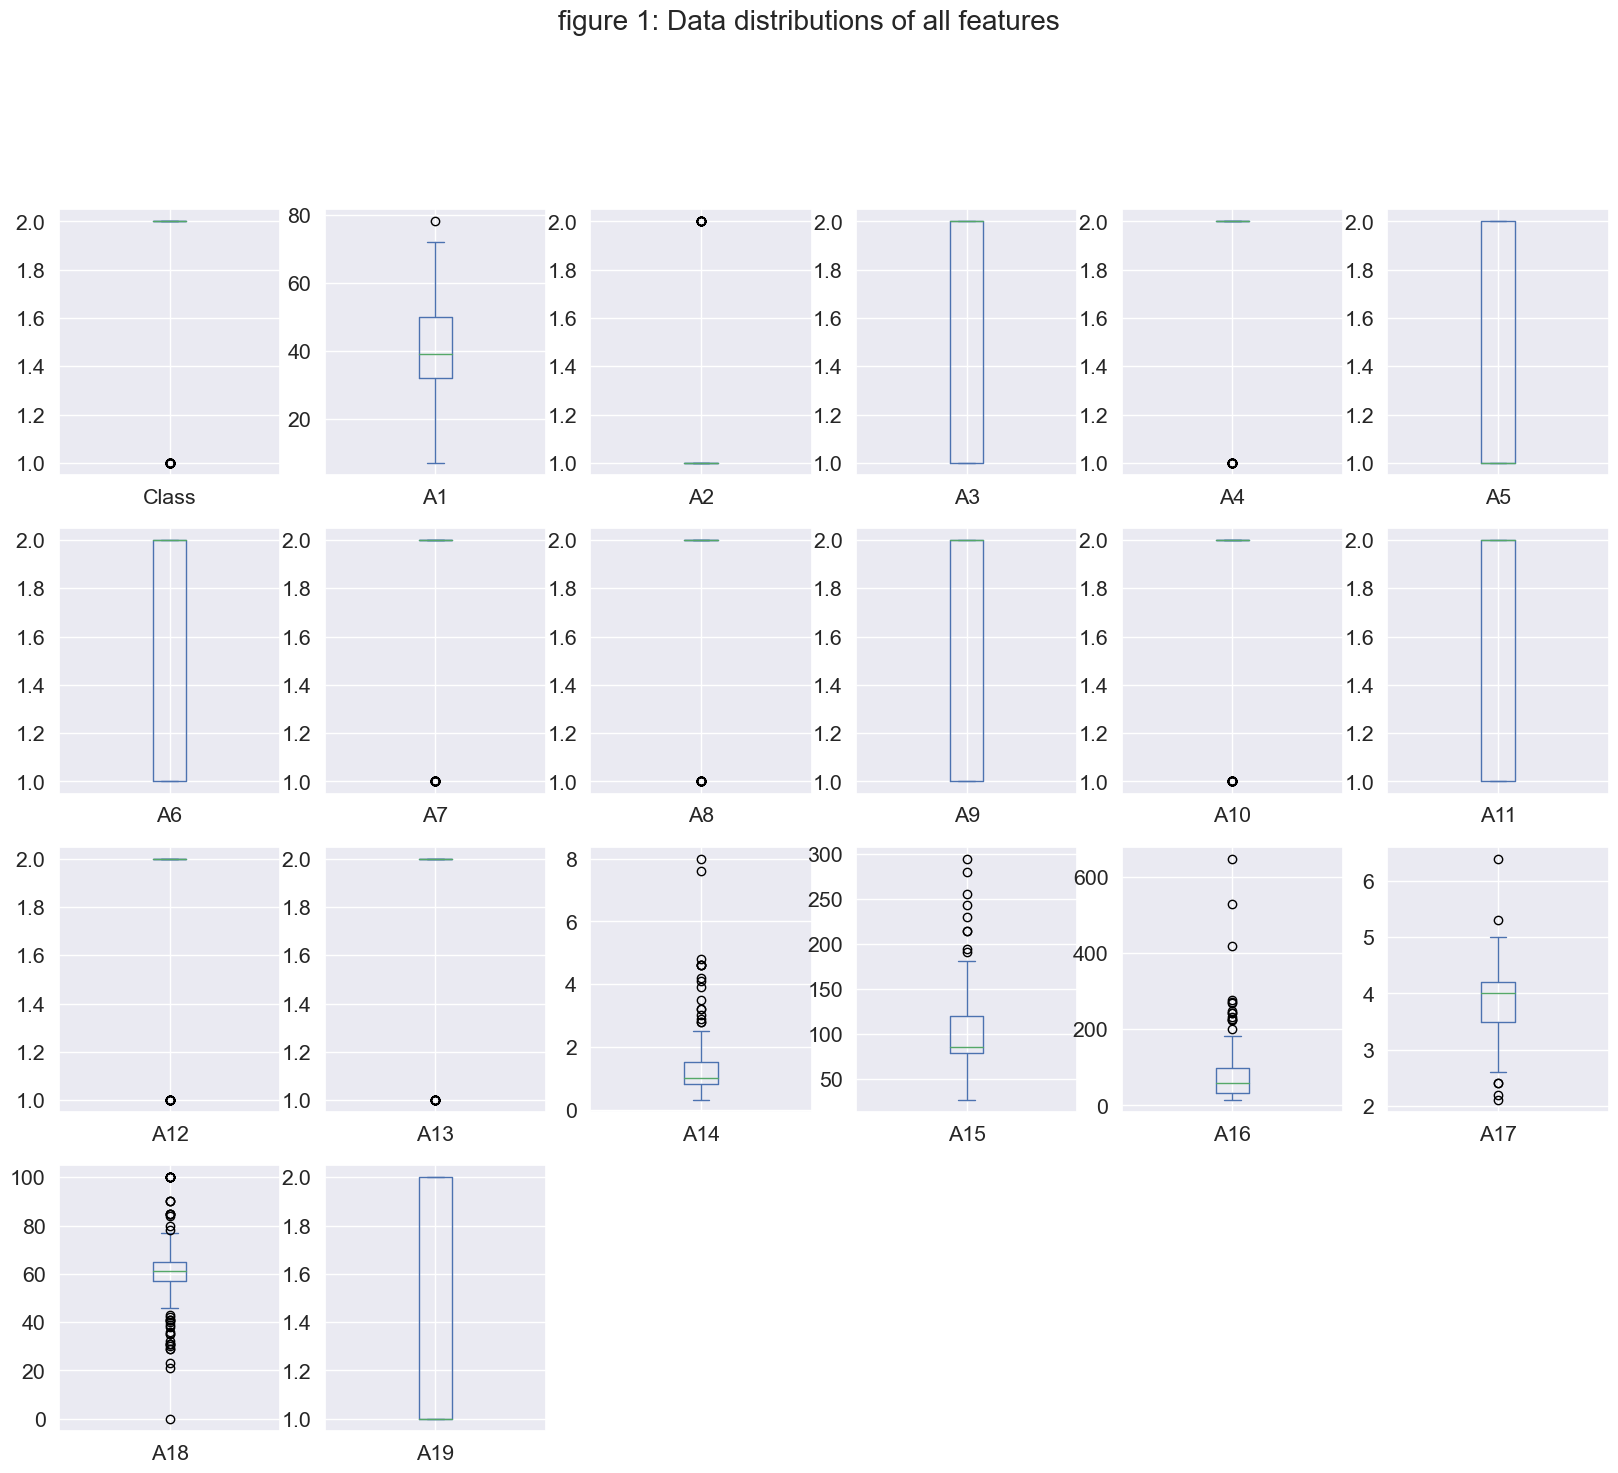

In [59]:
dataset.plot(kind='box',subplots=True,layout=(5,6), sharex=False,figsize = (20,20),
                           title='figure 1: Data distributions of all features')
plt.show()

# Bab 7 Menentukan Label Data

In [60]:
y = dataset['Class'] #case jika akan melakukan klasfikikasi untuk membangun model

In [61]:
y #cek variable y

0      2
1      2
2      2
3      2
4      2
      ..
150    1
151    2
152    2
153    2
154    1
Name: Class, Length: 155, dtype: int64

In [62]:
#menentukan jumlah cluster (jumlah cluester = 2, dan metode clustering yg digunakan adalah KMeans)
km = KMeans(n_clusters=2)
#case klasterisasi
#untuk mejalankan perintah ini anda perlu periksa kembali library anda pada bab 1 untuk klasterisasi

In [63]:
km

KMeans(n_clusters=2)

# Bab 8 Membangun Model

In [66]:
X = dataset.drop(["A2","A3","A4","A5","A6","A7","A8","A9","A10",
                 "A11","A12","A13","A14","A15","A16","A17","A18","A19"], axis = 1)
X

,Class,A1
0,2,30
1,2,50
2,2,78
3,2,31
4,2,34
...,...,...
150,1,46
151,2,44
152,2,61
153,2,53


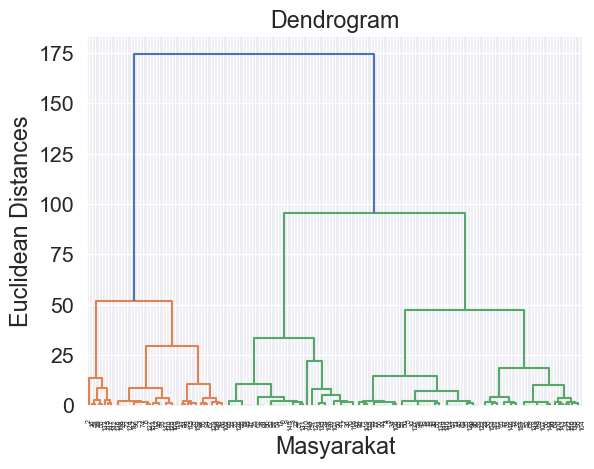

In [67]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Masyarakat")
plt.ylabel("Euclidean Distances")
plt.show()

In [68]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
ac.fit(X)

AgglomerativeClustering(n_clusters=5)

In [69]:
hasil_ac = X.copy()
hasil_ac["cluster"] = ac.labels_
hasil_ac.sample(5)

,Class,A1,cluster
10,2,39,4
91,1,42,2
25,2,27,0
135,2,25,0
139,2,45,2


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


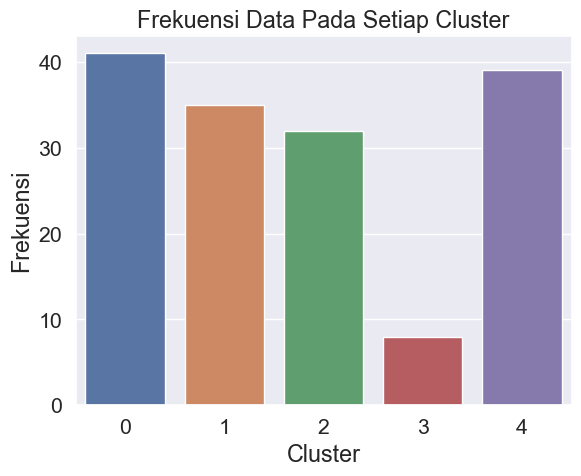

In [70]:
cluster_x1 = hasil_ac ["cluster"].value_counts().index
cluster_y1 = hasil_ac ["cluster"].value_counts().values

sns.barplot(cluster_x1,cluster_y1)
plt.title("Frekuensi Data Pada Setiap Cluster")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")
plt.show()

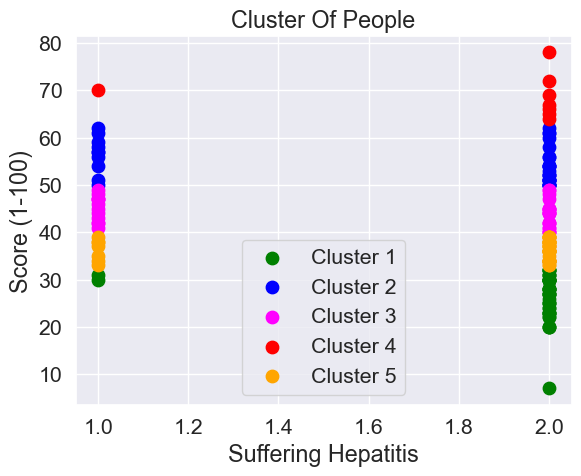

In [71]:
ann_ac0 = hasil_ac[hasil_ac["cluster"]== 0].iloc[:,0]
spend_ac0 = hasil_ac[hasil_ac["cluster"]== 0].iloc[:,1]
ann_ac1 = hasil_ac[hasil_ac["cluster"]== 1].iloc[:,0]
spend_ac1 = hasil_ac[hasil_ac["cluster"]== 1].iloc[:,1]
ann_ac2 = hasil_ac[hasil_ac["cluster"]== 2].iloc[:,0]
spend_ac2 = hasil_ac[hasil_ac["cluster"]== 2].iloc[:,1]
ann_ac3 = hasil_ac[hasil_ac["cluster"]== 3].iloc[:,0]
spend_ac3 = hasil_ac[hasil_ac["cluster"]== 3].iloc[:,1]
ann_ac4 = hasil_ac[hasil_ac["cluster"]== 4].iloc[:,0]
spend_ac4 = hasil_ac[hasil_ac["cluster"]== 4].iloc[:,1]

plt.scatter(ann_ac0, spend_ac0, s=80, c="green",label ="Cluster 1")
plt.scatter(ann_ac1, spend_ac1, s=80, c="blue",label ="Cluster 2")
plt.scatter(ann_ac2, spend_ac2, s=80, c="magenta",label ="Cluster 3")
plt.scatter(ann_ac3, spend_ac3, s=80, c="red",label ="Cluster 4")
plt.scatter(ann_ac4, spend_ac4, s=80, c="orange",label ="Cluster 5")
plt.title("Cluster Of People")
plt.xlabel("Suffering Hepatitis")
plt.ylabel("Score (1-100)")
plt.legend()
plt.show()